In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import gdown

file_id = "file_id"
output = "File_name.csv"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# Load into Pandas
df = pd.read_csv(output)
print(df.head())

Downloading...
From (original): https://drive.google.com/uc?id=1ZqVdr9td8KAAv8hJbhNAhwfCQ4sxKslW
From (redirected): https://drive.google.com/uc?id=1ZqVdr9td8KAAv8hJbhNAhwfCQ4sxKslW&confirm=t&uuid=186a006f-f323-4d8e-88f4-20e677cb7940
To: c:\Users\pooya\Downloads\Telegram Desktop\browse_purchase_2022_FY.csv
100%|██████████| 192M/192M [00:28<00:00, 6.73MB/s] 
C:\Users\pooya\AppData\Local\Temp\ipykernel_18068\2848027582.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output)


         date                customerId        country       city  \
0  2022-01-20  3UTw1Ru+ahnKAwPNAQZkxA==         France     Meudon   
1  2022-01-20  M1uzsFbXHQ+s5BIIjYcgHg==        Ukraine    Poltava   
2  2022-01-20  ZBiFJwut1IdmlSqc27edGA==        Ukraine   Mykolaiv   
3  2022-01-20  WqkjFVAdBHmwnr0j1hoFeA==  United States    Ashburn   
4  2022-01-20  thZWAdudx377qV8dGAju7Q==        Algeria  (not set)   

   visitStartTime browser deviceCategory visit_from_app utm_medium  \
0      1642692636  Chrome        desktop          False     (none)   
1      1642633226  Chrome        desktop          False     (none)   
2      1642716112  Chrome        desktop          False     (none)   
3      1642639047  Safari        desktop          False     (none)   
4      1642703113  Safari         mobile          False     (none)   

  channelGrouping  ...  products_refunded  visit_with_add_to_cart  \
0          Direct  ...                  0                       1   
1          Direct  ...    

In [21]:
df=pd.read_csv("browse_purchase_2022_FY.csv", low_memory=False)

In [22]:
df.head(2).T

,0,1
date,2022-01-20,2022-01-20
customerId,3UTw1Ru+ahnKAwPNAQZkxA==,M1uzsFbXHQ+s5BIIjYcgHg==
country,France,Ukraine
city,Meudon,Poltava
visitStartTime,1642692636,1642633226
browser,Chrome,Chrome
deviceCategory,desktop,desktop
visit_from_app,False,False
utm_medium,(none),(none)
channelGrouping,Direct,Direct


In [23]:
db=df[["customerId", "date", "product_quantity_purchased", "tot_revenue"]]
db=db[db.tot_revenue.notna()]

In [24]:
db.head(2)

,customerId,date,product_quantity_purchased,tot_revenue
0,3UTw1Ru+ahnKAwPNAQZkxA==,2022-01-20,28.0,98.190
1,M1uzsFbXHQ+s5BIIjYcgHg==,2022-01-20,74.0,319.425


In [25]:
print("Maximum date purchase is ", db.date.max())
print("Minimum date purchase is ", db.date.min())

Maximum date purchase is  2022-03-18
Minimum date purchase is  2022-01-01


In [26]:
import datetime as dt
now = pd.Timestamp(db.date.max())
print(now)

2022-03-18 00:00:00


### RFM Analysis  
RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique used to evaluate customer value based on their purchasing behavior. **Recency (R)** measures how recently a customer made a purchase, **Frequency (F)** tracks how often they buy, and **Monetary (M)** assesses how much they spend. By scoring customers on these dimensions, businesses can identify key segments such as loyal customers, big spenders, or at-risk customers. This helps in tailoring marketing strategies, improving customer retention, and maximizing revenue by focusing efforts on the most valuable segments.

In [27]:
recency_df=db.sort_values(by=["customerId","date"]).groupby("customerId")["date"].last().reset_index()
recency_df.columns=['customerId','LastPurshaceDate']

In [28]:
recency_df['LastPurshaceDate']=pd.to_datetime(recency_df['LastPurshaceDate'])
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: int((now - x).days))

In [29]:
recency_df.head()

,customerId,LastPurshaceDate,Recency
0,++0Dxza60/nPDbfORBYuuA==,2022-02-26,20
1,++0f45nPCVLLplbn4+Duvw==,2022-02-12,34
2,++4FV+zpIjWYGOp00jDigw==,2022-03-12,6
3,++5RExvb0CRlvMSB2J+kLg==,2022-02-27,19
4,++7/YKNQbfW4zR5VkdIf7A==,2022-03-08,10


In [30]:
freq_df=db.groupby("customerId")["product_quantity_purchased"].sum().reset_index()
freq_df.columns=['customerId','Frequency']

In [31]:
freq_df.head()

,customerId,Frequency
0,++0Dxza60/nPDbfORBYuuA==,16.0
1,++0f45nPCVLLplbn4+Duvw==,12.0
2,++4FV+zpIjWYGOp00jDigw==,14.0
3,++5RExvb0CRlvMSB2J+kLg==,18.0
4,++7/YKNQbfW4zR5VkdIf7A==,144.0


In [32]:
money=db.groupby("customerId")["tot_revenue"].sum().reset_index()
money.columns=["customerId","Monetary"]

In [33]:
df_rfm=recency_df.merge(freq_df,on='customerId',how='left').merge(money,on='customerId',how='left')

In [34]:
df_rfm.head()

,customerId,LastPurshaceDate,Recency,Frequency,Monetary
0,++0Dxza60/nPDbfORBYuuA==,2022-02-26,20,16.0,40.395
1,++0f45nPCVLLplbn4+Duvw==,2022-02-12,34,12.0,38.580
2,++4FV+zpIjWYGOp00jDigw==,2022-03-12,6,14.0,41.925
3,++5RExvb0CRlvMSB2J+kLg==,2022-02-27,19,18.0,37.170
4,++7/YKNQbfW4zR5VkdIf7A==,2022-03-08,10,144.0,379.740


In [35]:
quartiles = df_rfm.select_dtypes(include=['number']).quantile(q=[0.25, 0.5, 0.75])
quartiles

,Recency,Frequency,Monetary
0.25,20.0,10.0,41.49
0.50,40.0,14.0,49.71
0.75,58.0,20.0,75.57


In [36]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [37]:
rfm_segmentation = df_rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quartiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quartiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quartiles,))

In [38]:
rfm_segmentation.head()

,customerId,LastPurshaceDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,++0Dxza60/nPDbfORBYuuA==,2022-02-26,20,16.0,40.395,4,3,1
1,++0f45nPCVLLplbn4+Duvw==,2022-02-12,34,12.0,38.580,3,2,1
2,++4FV+zpIjWYGOp00jDigw==,2022-03-12,6,14.0,41.925,4,2,2
3,++5RExvb0CRlvMSB2J+kLg==,2022-02-27,19,18.0,37.170,4,3,1
4,++7/YKNQbfW4zR5VkdIf7A==,2022-03-08,10,144.0,379.740,4,4,4


In [39]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,customerId,LastPurshaceDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,++0Dxza60/nPDbfORBYuuA==,2022-02-26,20,16.0,40.395,4,3,1,431
1,++0f45nPCVLLplbn4+Duvw==,2022-02-12,34,12.0,38.580,3,2,1,321
2,++4FV+zpIjWYGOp00jDigw==,2022-03-12,6,14.0,41.925,4,2,2,422
3,++5RExvb0CRlvMSB2J+kLg==,2022-02-27,19,18.0,37.170,4,3,1,431
4,++7/YKNQbfW4zR5VkdIf7A==,2022-03-08,10,144.0,379.740,4,4,4,444


### 📌 Segmentation Logic & Insights  
- **Best Customers (444)**: Highly engaged & valuable—retain with loyalty programs.  
- **Loyal Customers (High R & F)**: Frequent buyers—nurture with personalized offers.  
- **Big Spenders (High M)**: High spenders—upsell & provide premium services.  
- **Almost Lost (244)**: Previously valuable but inactive—win-back strategies needed.  
- **Lost Customers (144)**: Long inactive—target with re-engagement incentives.  
- **Lost Cheap Customers (111)**: Low-value & inactive—minimal effort unless profitable.  


In [40]:
def get_status(row):
    if '444' in row['RFMScore']:
        return 'Best Customers'
    elif '244' in row['RFMScore']: 
        return 'Almost Lost'
    elif '144' in row['RFMScore']: 
        return 'Lost Customers'
    elif '111' in row['RFMScore']: 
        return 'Lost Cheap Customers'
    elif '4' in str(row['R_Quartile']) and '4' in str(row['F_Quartile']):
        return 'Loyal Customers'
    elif '4' in str(row['M_Quartile']):
        return 'Big Spenders'
    else:
        return 'Others'

rfm_segmentation["Status"]= rfm_segmentation.apply(get_status, axis=1)

### Insights from Heatmap Analysis  

The heatmap visualizes the **average Monetary Score** based on Recency (R) and Frequency (F) quartiles. Key observations include:  

- **Higher Frequency leads to higher Monetary values**: As we move right across the heatmap (higher F_Quartile), the Monetary Score increases consistently. This indicates that frequent buyers tend to spend more.  
- **Recent buyers (higher R_Quartile) show stable spending patterns**: The Monetary Score remains relatively high for customers in R_Quartile 4, suggesting that retaining recent customers is beneficial for revenue.  
- **Customers with low Frequency and Recency (bottom-left) have the lowest Monetary values**: These segments (R_Quartile 1, F_Quartile 1) indicate inactive or lost customers with minimal spending.  
- **High-value customers (top-right)**: The highest Monetary Score is observed at **(R_Quartile 4, F_Quartile 4)**, confirming that the most recent and frequent customers contribute the most revenue.  

**Actionable Takeaways**:  
📌 Focus retention efforts on customers in **R_Quartile 3 & 4** to maintain spending levels.  
📌 Develop re-engagement strategies for low Recency & Frequency customers to increase monetary contributions.  
📌 Reward high-frequency customers with personalized offers to sustain loyalty and spending behavior.  


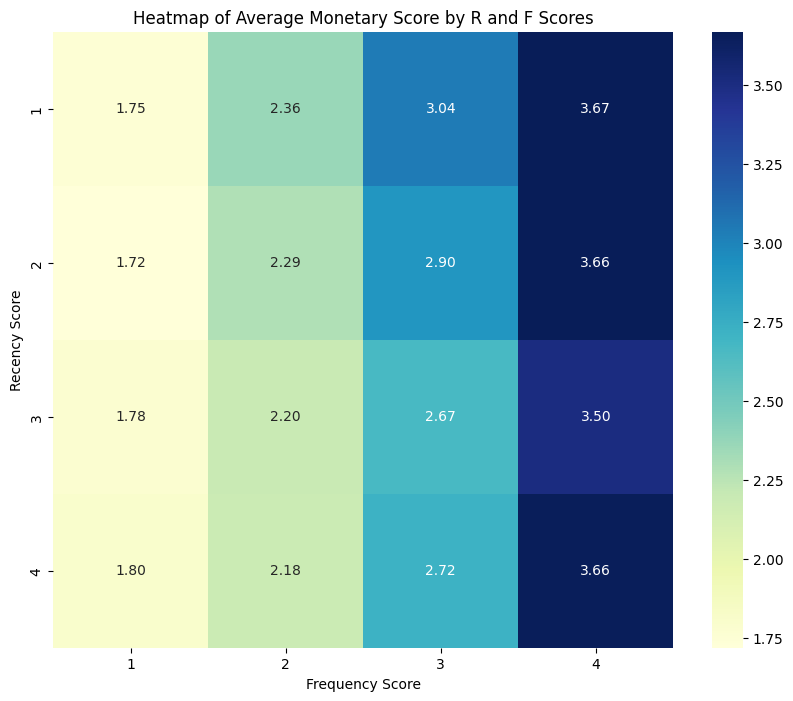

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `rfm` with columns 'Recency_Score', 'Frequency_Score', 'Monetary_Score'
heatmap_data = rfm_segmentation.groupby(['R_Quartile', 'F_Quartile'])['M_Quartile'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='R_Quartile', columns='F_Quartile', values='M_Quartile')


plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Average Monetary Score by R and F Scores")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.show()


In [42]:
from math import pi
import plotly.express as px
# Prepare data for radar chart
radar_data = rfm_segmentation.groupby('Status')[['R_Quartile', 'F_Quartile', 'M_Quartile']].mean().reset_index()
categories = ['R_Quartile', 'F_Quartile', 'M_Quartile']

# Convert data for radar chart
radar_data_melted = radar_data.melt(id_vars=['Status'], var_name='Metric', value_name='Score')

# Create radar chart
fig = px.line_polar(radar_data_melted, r='Score', theta='Metric', color='Status', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(title='Radar Chart of RFM Scores by Segment', polar=dict(radialaxis=dict(visible=True)))
fig.show()



The box plo and distribution plotsts provide a **distribution analysis** of Recency, Frequency, and Monetary values:  

- **Recency**: The box plot appears well-defined, indicating that the distribution is relatively balanced. There might be some outliers, but overall, most customers have recent interactions within a reasonable range.  
- **Frequency & Monetary**: These distributions show significant **right-skewness**, meaning most customers have low purchase frequency and spending, while a few high-value customers drive up the overall average. Instead of a box, only scattered points (outliers) are visible, which suggests that the data is heavily skewed with extreme values.  

#### **Actionable Takeaways**  
📌 Since **most customers purchase infrequently**, strategies like loyalty programs or personalized offers can encourage repeat purchases.  
📌 **High-spending customers** should be identified and targeted with premium offers to maximize revenue from their continued engagement.  
📌 **Data normalization or log transformation** may be useful for modeling, given the extreme skewness in Frequency and Monetary distributions.  


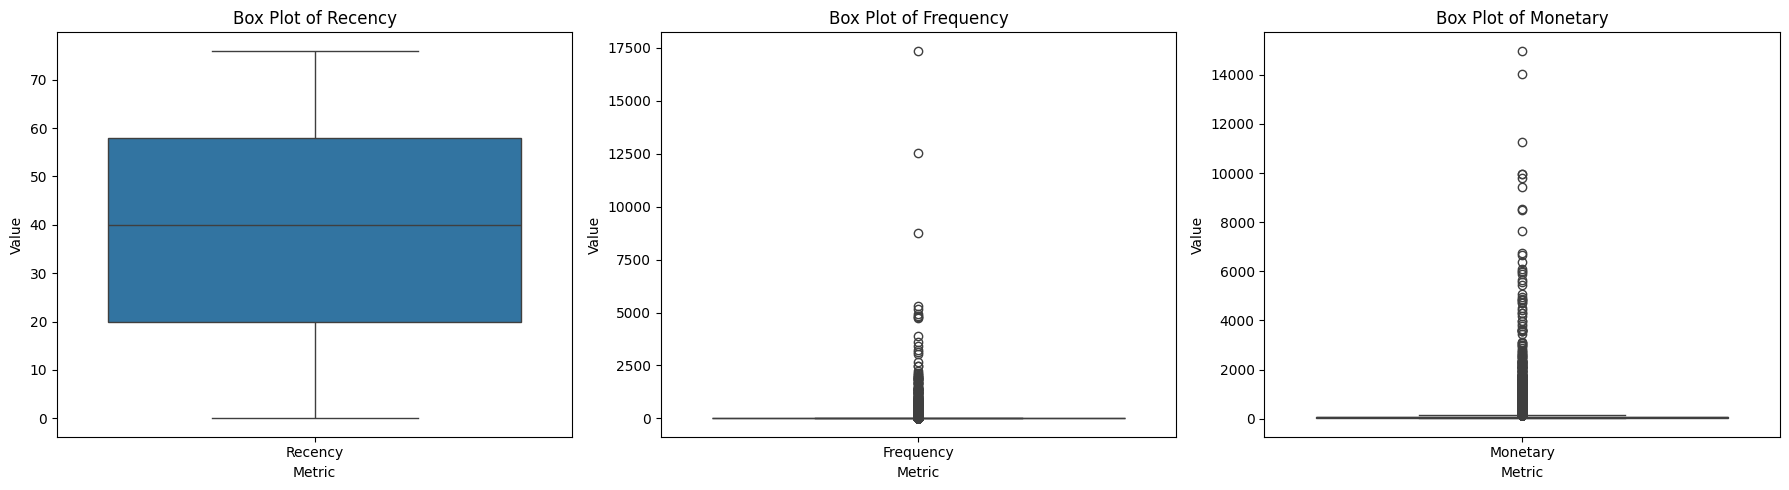

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Box plot for Recency
rfm_melted = rfm_segmentation.melt(value_vars=['Recency'], var_name='Metric', value_name='Value')
sns.boxplot(data=rfm_melted, x='Metric', y='Value', ax=axes[0])
axes[0].set_title('Box Plot of Recency')

# Box plot for Frequency
rfm_melted = rfm_segmentation.melt(value_vars=['Frequency'], var_name='Metric', value_name='Value')
sns.boxplot(data=rfm_melted, x='Metric', y='Value', ax=axes[1])
axes[1].set_title('Box Plot of Frequency')

# Box plot for Monetary
rfm_melted = rfm_segmentation.melt(value_vars=['Monetary'], var_name='Metric', value_name='Value')
sns.boxplot(data=rfm_melted, x='Metric', y='Value', ax=axes[2])
axes[2].set_title('Box Plot of Monetary')

plt.tight_layout()
plt.show()


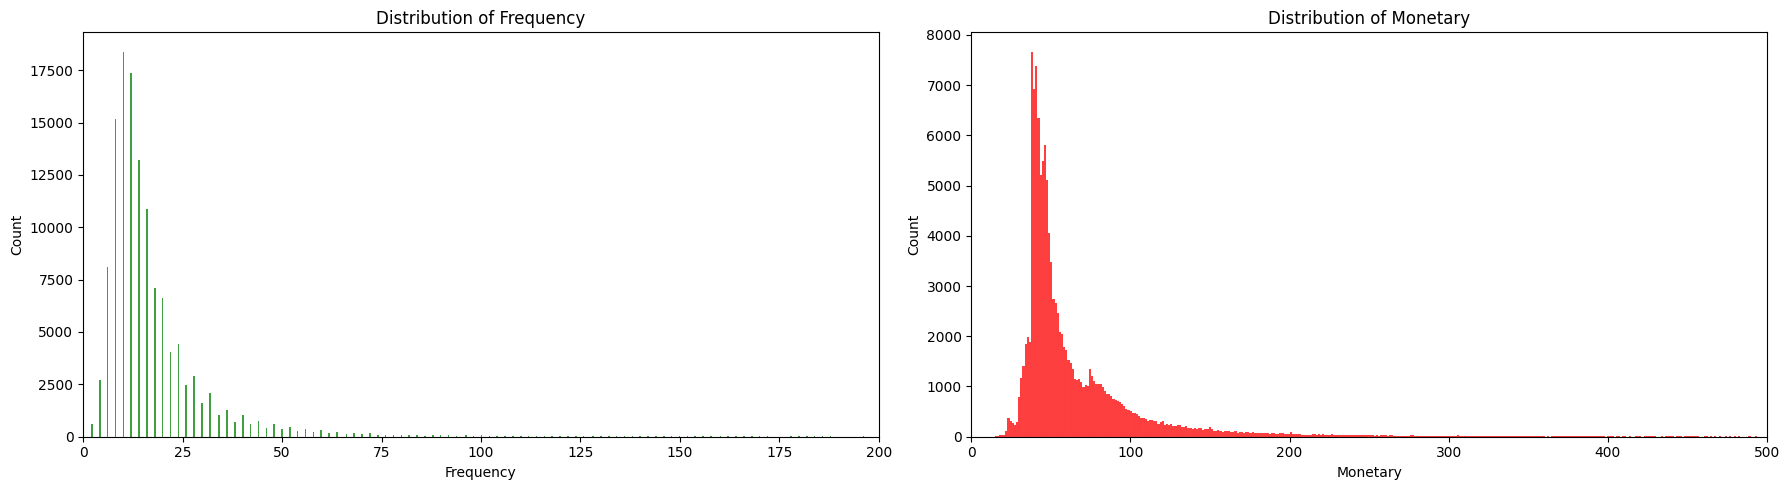

In [44]:
# Create histograms to check skewness
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Frequency
sns.histplot(rfm_segmentation['Frequency'], color='green', ax=axes[0])
axes[0].set_title('Distribution of Frequency')
axes[0].set_xlabel('Frequency')

# Monetary
sns.histplot(rfm_segmentation['Monetary'], color='red', ax=axes[1])
axes[1].set_title('Distribution of Monetary')
axes[1].set_xlabel('Monetary')

axes[0].set_xlim(0, 200)
axes[1].set_xlim(0, 500)

plt.tight_layout()
plt.show()


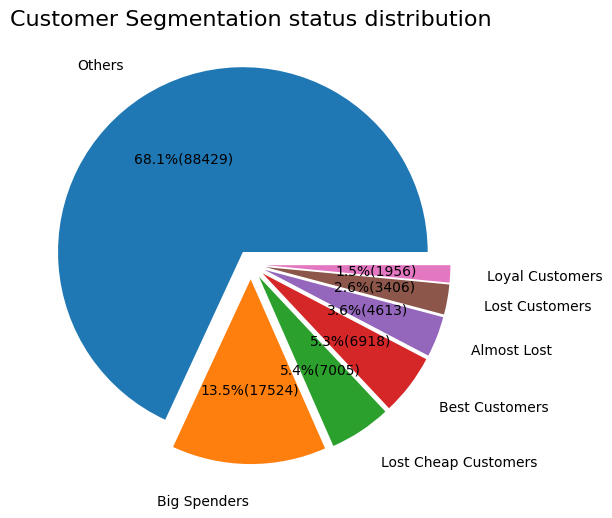

In [45]:
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{pct:.1f}%({absolute})"

# Explode parameter to separate slices slightly
status_counts = rfm_segmentation['Status'].value_counts()
explode = [0.08] * len(status_counts)  # Adjust for each slice if needed

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    status_counts,
    labels=status_counts.index,
    explode=explode,
    autopct=lambda pct: autopct_format(pct, status_counts),
    labeldistance=1.2  # Move labels outside the pie
)
plt.title("Customer Segmentation status distribution", fontsize=16)
plt.show()